In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [7]:
dataset = pd.read_csv("../data/processed/features_for_model.csv")
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,360,0,0,5849,0.0,146.412162,360.0,1.0,202,1
1,1,1,102,0,0,4583,1508.0,128.000000,360.0,1.0,179,0
2,1,1,360,0,1,3000,0.0,66.000000,360.0,1.0,202,1
3,1,1,360,1,0,2583,2358.0,120.000000,360.0,1.0,202,1
4,1,0,360,0,0,6000,0.0,141.000000,360.0,1.0,202,1


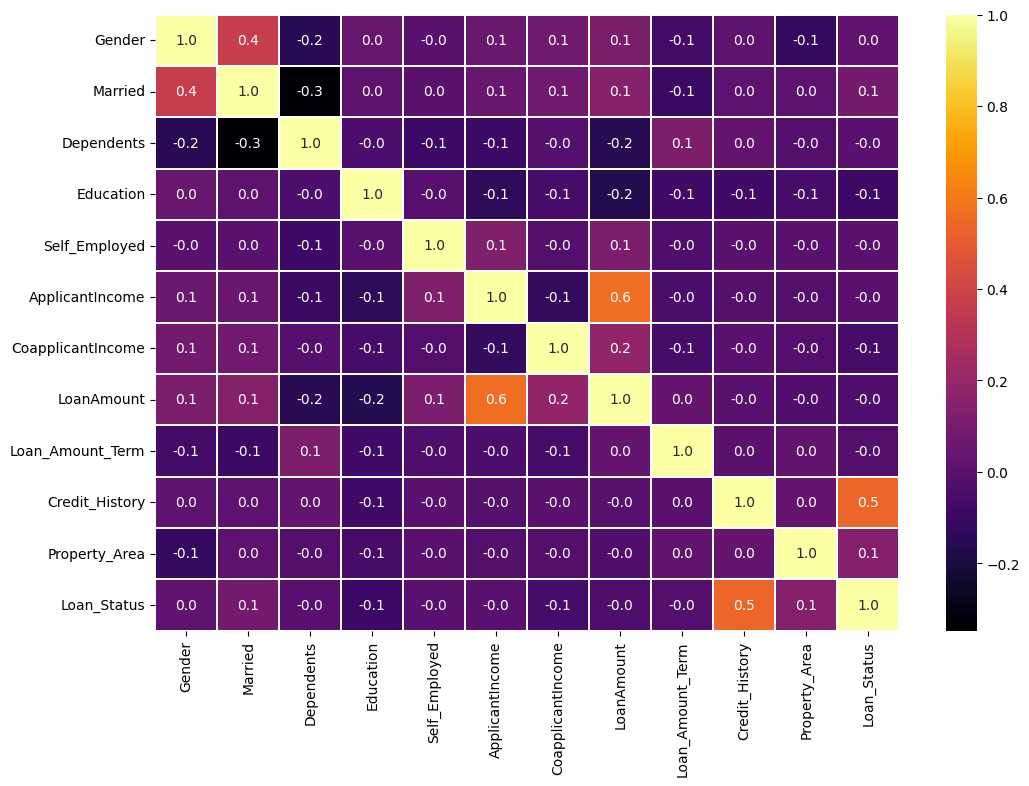

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='inferno', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Seleccion de Target y Features

In [9]:
X = dataset.drop(["Loan_Status"], axis=1)
y = dataset["Loan_Status"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=2025)

Configuramos y calculamos el StandarScaler

In [11]:
std_scaler = StandardScaler()
std_scaler.fit(X_train) # Calcular los valores para el scaler

StandardScaler()

Guardamos el scaler configurado (con datos de train) como artefacto del modelo.

In [12]:
import pickle

with open("../artifacts/std_scaler.pkl","wb") as f:
    pickle.dump(std_scaler,f)

## Creamos modelos de Prediccion

Modelo Regresión Logistica

In [13]:
X_train_std = std_scaler.transform(X_train)

modelo_rl = LogisticRegression()
modelo_rl.fit(X_train_std, y_train)


LogisticRegression()

Medimos el Performance

In [14]:
X_test_std = std_scaler.transform(X_test)

y_preds_rf = modelo_rl.predict(X_test_std)

accuracy_score(y_test,y_preds_rf)

0.7621621621621621

Modelos de Random Forest

In [30]:
# Modelo 1
rf_model_1 = RandomForestClassifier(n_estimators=50, max_depth=5)
rf_model_1.fit(X_train_std, y_train)





RandomForestClassifier(max_depth=5, n_estimators=50)

In [31]:
# Modelo 2
rf_model_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model_2.fit(X_train_std, y_train)



RandomForestClassifier(max_depth=10)

In [43]:
# Modelo 3
rf_model_3 = RandomForestClassifier(n_estimators=300, max_depth=15)
rf_model_3.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=15, n_estimators=300)

Medimos el Performance

In [44]:
y_preds_rf_1 = rf_model_1.predict(X_test_std)
y_preds_rf_2 = rf_model_2.predict(X_test_std)
y_preds_rf_3 = rf_model_3.predict(X_test_std)


In [45]:
print("Random Forest Model Accuracies:")
print(f"Modelo 1: Accuracy = {accuracy_score(y_test, y_preds_rf_1)}")
print(f"Modelo 2: Accuracy = {accuracy_score(y_test, y_preds_rf_2)}")
print(f"Modelo 3: Accuracy = {accuracy_score(y_test, y_preds_rf_3)}")


Random Forest Model Accuracies:
Modelo 1: Accuracy = 0.7675675675675676
Modelo 2: Accuracy = 0.7621621621621621
Modelo 3: Accuracy = 0.7567567567567568


Modelos de XGBoost

In [35]:
# Modelo 1
xgb_model_1 = XGBClassifier(n_estimators=50, max_depth=5)
xgb_model_1.fit(X_train_std, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
# Modelo 2
xgb_model_2 = XGBClassifier(n_estimators=100, max_depth=10)
xgb_model_2.fit(X_train_std, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
# Modelo 3
xgb_model_3 = XGBClassifier(n_estimators=200, max_depth=15)
xgb_model_3.fit(X_train_std, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Medimos el Performance

In [40]:
y_preds_xgb_1 = xgb_model_1.predict(X_test_std)
y_preds_xgb_2 = xgb_model_2.predict(X_test_std)
y_preds_xgb_3 = xgb_model_3.predict(X_test_std)

In [39]:
print("\nXGBoost Model Accuracies:")
print(f"Modelo 1: Accuracy = {accuracy_score(y_test, y_preds_xgb_1)}")
print(f"Modelo 2: Accuracy = {accuracy_score(y_test, y_preds_xgb_2)}")
print(f"Modelo 3: Accuracy = {accuracy_score(y_test, y_preds_xgb_3)}")


XGBoost Model Accuracies:
Modelo 1: Accuracy = 0.7567567567567568
Modelo 2: Accuracy = 0.7243243243243244
Modelo 3: Accuracy = 0.7297297297297297


El mejor modelo entre Random Forest y XGBoost es el Random Forest Modelo 1 con un Accuracy = 0.7675675675675676